---
<a name='title'></a>
# **<font color="Navy"> Modelación Climática </font>**
## **<font color="RoyalBlue"> Tema 3: Modelos climáticos simples </font>**
### **<font color="DodgerBlue"> Notebook 1: FAIR desde cero </font>**
### Escuela Nacional de Ciencias de la Tierra
#### Semestre 2024-II

---



# **<font color="ForestGreen"> FaIR </font>**

El modelo de Finite amplitude impulse response (FaIR) es un modelo de impulso respuesta que considera emisiones y concentraciones para calcular un  forzamiento y con eso calcula impactos en el nivel del mar y temperatura. 

Fair es un modelo escrito en un objeto de Python que se llama clase. Así como la clase de Budyko_Sellers, todas las clases son objetos que engloban un conjunto de funciones que para la clase son denominados atributos. 

Para empezar, consideremos que la paquetería se llama `fair` y podemos importarla de la siguiente manera: 

In [1]:
from fair import FAIR
import numpy as np
import pandas as pd
import xarray as xr
import matplotlib.pyplot as plt

In [2]:
def lineplot_setup(xmin,xmax,xlab,ylab,ymin=None,ymax=None,title=None,legend=False):
    # especificar limites minimos y maximos del grafico
    plt.xlim([xmin,xmax])
    plt.ylim([ymin,ymax])
    # cuadrilla interna del grafico
    plt.grid(linestyle='--',alpha=0.66)
    plt.minorticks_on()
    # hacer las etiquetas de ambos ejes mas grandes
    plt.xticks(fontsize=12)
    plt.yticks(fontsize=12)
    plt.xlabel(xlab,fontsize=14)
    plt.ylabel(ylab,fontsize=14)
    plt.title(title,fontsize=15)
    if legend:
        plt.legend(fancybox=True,shadow=True,fontsize=12.5)

## **<font color="ForestGreen"> Paso 1: Iniciar la clase </font>**

Iniciar la clase quiere decir llamar a la función que engloba a la clase y guardarla dentro de una variable. 

In [3]:
f = FAIR()

Es importante mencionar en este punto que FaIR es un modelo de cajas, en este caso una "layer" se refiere a las capas, la primera es la superficie, la segunda es la primer capa océanica y la tercera es el océano profundo. Esto en su definición por default son 3 "layers". Los "gasboxes" son las cajas atmosféricas donde se guardan los gases y donde se resuelve la temperatura. La caja más inferior es la superficial. 

In [4]:
print(f.layers)
print(f.gasboxes)

range(0, 3)
range(0, 4)


Esta paso anterior ha guardado la clase en la variable `f`. 
Ahora falta definir el horizonte de tiempo

## **<font color="ForestGreen"> Paso 2 Tiempo de simulacion </font>**

En FaIR el tiempo es la única dimensión y por lo tanto, técnicamente podríamos hacer la simulación que queramos en el tiempo que queramos. De manera general, vamos a querer hacer simulaciones que sean parecidas a las del IPCC. 

Hay dos indicadores diferentes del tiempo en este modelo: `timebound` y `timepoint`. 
El intervalo de tiempo `timebound` son las coordenadas del tiempo que rodean o que se encuentran alrededor de un paso de tiempo, son fotos instantáneas de lo que está sucediendo. El punto en el tiempo, `timepoint` es lo que sucede en el intervalo de tiempo. Es decir, cada `timepoint` se encuentra en medio de dos `timebound`. Esta segunda coordenada del tiempo nos sirve porque es en esta coordenada donde se calculan los cambios  y por lo general en este punto del tiempo tendremos medidas de tasa de cambio de cantidades. 

Lo más importante es ver que la variable de emisiones, `emissions`, está definida sobre un `timepoint` y todo lo demás sobre `timebound`.

El número de `timebound` es uno más que el número de `timepoint`s, ya que el intervalo incluye el punto final y el punto inicial. 

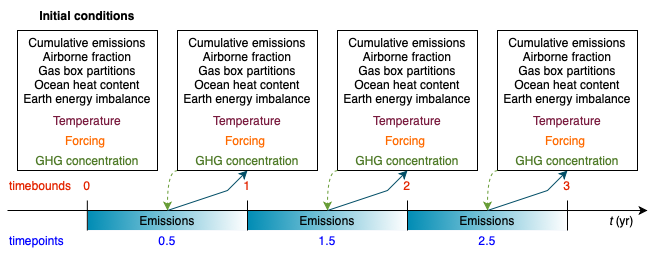

Para definir el tiempo se utiliza el atributo de `define_time` que toma argumentos muy similares a `np.arange`

In [5]:
# crear horizonte de tiempo de 1950 a 2050 en saltos 1 año
f.define_time(1950, 2050, 1)
# timebounds
print(f.timebounds)
# timepoints
print(f.timepoints)

[1950. 1951. 1952. 1953. 1954. 1955. 1956. 1957. 1958. 1959. 1960. 1961.
 1962. 1963. 1964. 1965. 1966. 1967. 1968. 1969. 1970. 1971. 1972. 1973.
 1974. 1975. 1976. 1977. 1978. 1979. 1980. 1981. 1982. 1983. 1984. 1985.
 1986. 1987. 1988. 1989. 1990. 1991. 1992. 1993. 1994. 1995. 1996. 1997.
 1998. 1999. 2000. 2001. 2002. 2003. 2004. 2005. 2006. 2007. 2008. 2009.
 2010. 2011. 2012. 2013. 2014. 2015. 2016. 2017. 2018. 2019. 2020. 2021.
 2022. 2023. 2024. 2025. 2026. 2027. 2028. 2029. 2030. 2031. 2032. 2033.
 2034. 2035. 2036. 2037. 2038. 2039. 2040. 2041. 2042. 2043. 2044. 2045.
 2046. 2047. 2048. 2049. 2050.]
[1950.5 1951.5 1952.5 1953.5 1954.5 1955.5 1956.5 1957.5 1958.5 1959.5
 1960.5 1961.5 1962.5 1963.5 1964.5 1965.5 1966.5 1967.5 1968.5 1969.5
 1970.5 1971.5 1972.5 1973.5 1974.5 1975.5 1976.5 1977.5 1978.5 1979.5
 1980.5 1981.5 1982.5 1983.5 1984.5 1985.5 1986.5 1987.5 1988.5 1989.5
 1990.5 1991.5 1992.5 1993.5 1994.5 1995.5 1996.5 1997.5 1998.5 1999.5
 2000.5 2001.5 2002.5 2003.5 

## **<font color="ForestGreen"> Paso 3: definir los escenarios </font>**

Los escenarios son representaciones de lo que va a suceder con las concentraciones y las emisiones. 
En este modelo, son un objeto, en particular son una lista `list` de cadenas o `str` que le dan una etiqueta a la dimensión del escenario del modelo. Esto permite saber qué resultados le corresponden a qué escenario. 

Hay escenarios pre-establecidos y escenarios que uno puede crear. 

En este primer ejemplo vamos a crear dos escenarios. Les llamaremos "abrupto" y "suave". 
En el primero incrementaremos las concentraciones, a través una emisión puntual, y en el segundo aumentaremos las concentraciones paulatinamente. 

Un escenario es una proyección plausible del futuro que describe cómo las emisiones de gases de efecto invernadero (GEI) podrían evolucionar a lo largo del tiempo. En este caso, consideramos como escenario a todo el conjunto de elementos del modelo y su evolución en el tiempo, es decir, no sólo las concentraciones de GEIs sino también el forzamiento solar, volcánico, etc. 

En esta versión **manual** los escenarios los vamos a definir nosotros. 

Primero sólo los definimos, es decir, les ponemos nombre. 

In [6]:
# Definir 2 escenarios
f.define_scenarios(["abrupto", "suave"])
f.scenarios

['abrupto', 'suave']

## **<font color="ForestGreen"> Paso 4: definir las configuraciones </font>**

Así como los escenarios, las configuraciones `configs` son parámetros físicos y químicos del modelo. 
Por ejemplo, recuerdan que utilizamos el parámetro de la capacidad calorífica o profundiad del océano, en FaIR se puede modificar este parámetro. También podemos modificar el potencial de calentamiento de algunos gases. 

En una sola clase `f` podemos especificar varias configuraciones, a lo mejor en alguna queremos que nuestro modelo sea con ciertos parámetros para algunos gases o en otra una configuración con un océano más sensible a los cambios. 
Es decir, cada configuración va a tener asociada parámetros específicos de cómo es el clima y de cómo son las especies químicas. 

En este primer ejemplo usaremos 3 configuraciones, correspondientes a sensibilidad del clima alta, baja o media. 
En unas celdas más es dónde modificamos directamente qué quiere decir cada una de estas configuraciones. 


In [7]:
# Definiendo mis tres configuraciones para mis dos escenarios
f.define_configs(["alta", "media", "baja"])
f.configs

['alta', 'media', 'baja']

## **<font color="ForestGreen"> Paso 5: Definir las especies químicas </font>**

FaIR es un modelo cuya principal ecuación es el ciclo de los gases. Los gases se emiten, interactúan químicamente y su concentración aumenta o decade dependiendo de este fino balance. Las ecuaciones para el ciclo del carbono, y el ciclo de los demás gases está definido para cada cajita atmosférica.

\begin{align}
\frac{dR_i(t)}{dt}=a_i E(t) - \frac{R_i(t)}{\alpha(t)\tau_i}
\end{align}

donde $R$ es la cantidad del agente o especie en la caja atmosférica $i$, $a_i$ es la fracción de emisiones entrando a esta caja $i$, $\tau_i$ es el tiempo de vida media en años para ese gas en esa caja, $E(t)$ es la serie de tiempo de emisiones emitidas a la atmósfera y $\alpha(t)$ es un coeficiente de ajuste de la concentración en cada caja. 

La concentración total ($C(t)$) de cada agente en toda la atmósfera es entonces la suma de la cantidad $R$ en cada caja: 

\begin{align}
C(t)=C_0 + \sum_{i=1}^n R_i(t)
\end{align}


Esto define los forzantes, antropogénicos o naturales que van a ser incluidos en cada escenario. 
Una `specie` es algo que puede ser directamente emitido como el CO$_2$ a través de combustibles fósiles, o puede ser una categoría donde el forzamiento tiene que ser calculado de emisiones precursoras como las interacciones nube-aerosol. 

Cada `specie` está asignada a un nombre que se utiliza para distinguirlo de otras especies. 
Además vamos a asignarle propiedades a cada especie. La lista completa de especies químicas disponibles es:  “co2 ffi”, “co2 afolu”, “co2”, “ch4”, “n2o”, “cfc-11”, “other halogen”, “f-gas”, “sulfur”, “black carbon”, “organic carbon”, “other slcf”, “nox aviation”, “eesc”, “ozone”, “ari”, “aci”, “contrails”, “lapsi”,”h2o stratospheric”, “land use”, “volcanic”, “solar”, “unspecified”. 

Para definir las especies utilizamos un diccionario. 

Aquí vamos a utilizar datos completamente inventados, estos no serán escenarios reales, sólo servirán de ilustración del modelo. 

En total, vamos a utilizar 8 especies. Primero, como **emisiones**, queremos utilizar:

1. CO2 fossil emissions, combustible fósil e industria
2. CO2 AFOLU emissions (Agriculture, Forestry, and Other Land Use) es decir emisiones de CO2 debido al cambio de uso de suelo. 
3. Azufre 

con emisiones determinadas por nosotros, las concentraciones las calculará el modelo. 

Y también, queremos correr:

4. CH4
5. N20

con concentraciones fijas especificadas por nosotros. Si queremos calcular el forzamiento por CO2 tenemos que declararlo como un gas de efecto invernadero, además de sus componentes de emisión:

6. CO2

También queremos calcular el forzamiento por aerosoles (radiativo) e interacciones aerosol-nube (radiativo indirecto). 


7. ERFari (effective radiative forcing induced by aerosol-radiation interactions)
8. ERFaci (effective radiative forcing induced by aerosol-cloud interactions)




In [8]:
species = ['CO2 fossil emissions', 'CO2 AFOLU emissions', 'Sulfur', 'CH4', 'N2O', 'CO2', 'ERFari', 'ERFaci']

En el diccionario `properties`, las llaves tienen que coincider con los nombre de las `species` que declaramos antes. Para cada especie vamos a definir otro diccionario, un diccionario dentro de otro. Las llaves o atributos de este diccionario serán. 

- `type` define el tipo de especie como CO2, un precursor de aerosoles o forzamiento volcanico. Hay 20 tipos predefinidos en este modelo. 
- `input_mode`: cómo el modelo debe interpretar o correr a esta `specie`. Los valores válidos son: `emissions`, `concentration`, `forcing` or `calculated` y no todas las opciones de input son válidas para cada tipo de especie `type`. Un ejemplo es el forzamiento solar, no se puede correr como concentraciones. `calculated` significa que las emisiones-concentración-forzamiento depende de otras especies, por ejemplo del forzamiento radiativo por aerosoles requiere de precursores para ser emitido. 
- `greenhouse_gas`: True  si la `specie` es un gas de efecto invernadero. El modelo traduce esto como que puede calcular una `concentration` asociada junto a otros comportamientos specíficos de cada especie (como sumideros o reacciones químicas). 
- `aerosol_chemistry_from_emissions`: algunas rutinas, como las que calculan el tiempo de vida de los aerosoles o el metano o el forzamiento por ozono, se relacionan directamente con forzamientos climáticos de corta duración. Si esta `specie` es una de ellas entonces esto debería ser True.
- `aerosol_chemistry_from_concentration`: Igual que arriba pero si la producción de ozono, aerosoles, depende de la concentración de gas, debe ser True. 

In [9]:
properties = {
    'CO2 fossil emissions': {
        'type': 'co2 ffi',
        'input_mode': 'emissions',
        'greenhouse_gas': False,  # esta especie no es directamente un GEI en el modelo, sino un precursor
        'aerosol_chemistry_from_emissions': False,
        'aerosol_chemistry_from_concentration': False,
    },
    'CO2 AFOLU emissions': {
        'type': 'co2 afolu',
        'input_mode': 'emissions',
        'greenhouse_gas': False,  # esta especie no es directamente un GEI en el modelo, sino un precursor
        'aerosol_chemistry_from_emissions': False,
        'aerosol_chemistry_from_concentration': False,
    },
    'CO2': {
        'type': 'co2',
        'input_mode': 'calculated',
        'greenhouse_gas': True, # esta especie sí es un GEI
        'aerosol_chemistry_from_emissions': False,
        'aerosol_chemistry_from_concentration': False,
    },
    'CH4': {
        'type': 'ch4',
        'input_mode': 'concentration',
        'greenhouse_gas': True,
        'aerosol_chemistry_from_emissions': False,
        'aerosol_chemistry_from_concentration': True, # el metano es un gas reactivo
    },
    'N2O': {
        'type': 'n2o',
        'input_mode': 'concentration',
        'greenhouse_gas': True,
        'aerosol_chemistry_from_emissions': False,
        'aerosol_chemistry_from_concentration': True, # el óxido nitros es un gas reactivo
    },
    'Sulfur': {
        'type': 'sulfur',
        'input_mode': 'emissions',
        'greenhouse_gas': False,
        'aerosol_chemistry_from_emissions': True,
        'aerosol_chemistry_from_concentration': False,
    },
    'ERFari': {
        'type': 'ari',
        'input_mode': 'calculated',
        'greenhouse_gas': False,
        'aerosol_chemistry_from_emissions': False,
        'aerosol_chemistry_from_concentration': False,
    },
    'ERFaci': {
        'type': 'aci',
        'input_mode': 'calculated',
        'greenhouse_gas': False,
        'aerosol_chemistry_from_emissions': False,
        'aerosol_chemistry_from_concentration': False,
    }
}

In [10]:
f.define_species(species, properties)

## **<font color="ForestGreen"> Paso 6: Crear datos de entrada y de salida del modelo </font>**

Los pasos 2--5 hasta el momento sólo han ayudado a configurar el modelo, ahora necesitamos crear datos de verdad, unos para la entrada del modelo y otros para la salida. 

Este paso genera los objetos de Python vacíos en los cuáles vamos a guardar nuestros datos de entrada y salida. Esto es muy similar a cuándo hacíamos datos vacíos, por rellenar durante la modelación, utilizando `np.zeros`, ¿recuerdan?

Primero colocamos los arreglos de datos con una orden `allocate`. 


In [11]:
f.allocate()

Esta última instrucción creó una serie de objetos conocidos como arrays. 
xarray es un módulo de Python muy utilizado en C. Atmosféricas porque permite generar datos en N-dimensiones, guardando nombres bonitos a las dimensiones, coordenadas y variables. 

Ahora tenemos arrays con las dimensiones correctas y los atributos necesarios de la clase Fair. 

Allocate genea todos los arreglos necesarios para nuestra simulación entre ellos uno para: 

Emisiones: `f.emissions`. 

Temperatura: `f.temperature`.

y también: `f.concentration`, `f.forcing`, `f.toa_imbalance`. 

Veamos:


In [12]:
f.emissions

<xarray.DataArray (timepoints: 100, scenario: 2, config: 3, specie: 8)>
array([[[[nan, nan, nan, ..., nan, nan, nan],
         [nan, nan, nan, ..., nan, nan, nan],
         [nan, nan, nan, ..., nan, nan, nan]],

        [[nan, nan, nan, ..., nan, nan, nan],
         [nan, nan, nan, ..., nan, nan, nan],
         [nan, nan, nan, ..., nan, nan, nan]]],


       [[[nan, nan, nan, ..., nan, nan, nan],
         [nan, nan, nan, ..., nan, nan, nan],
         [nan, nan, nan, ..., nan, nan, nan]],

        [[nan, nan, nan, ..., nan, nan, nan],
         [nan, nan, nan, ..., nan, nan, nan],
         [nan, nan, nan, ..., nan, nan, nan]]],


       [[[nan, nan, nan, ..., nan, nan, nan],
         [nan, nan, nan, ..., nan, nan, nan],
...
         [nan, nan, nan, ..., nan, nan, nan],
         [nan, nan, nan, ..., nan, nan, nan]]],


       [[[nan, nan, nan, ..., nan, nan, nan],
         [nan, nan, nan, ..., nan, nan, nan],
         [nan, nan, nan, ..., nan, nan, nan]],

        [[nan, nan, nan, ..., nan, nan, nan],
         [nan, nan, nan, ..., nan, nan, nan],
         [nan, nan, nan, ..., nan, nan, nan]]],


       [[[nan, nan, nan, ..., nan, nan, nan],
         [nan, nan, nan, ..., nan, nan, nan],
         [nan, nan, nan, ..., nan, nan, nan]],

        [[nan, nan, nan, ..., nan, nan, nan],
         [nan, nan, nan, ..., nan, nan, nan],
         [nan, nan, nan, ..., nan, nan, nan]]]])
Coordinates:
  * timepoints  (timepoints) float64 1.95e+03 1.952e+03 ... 2.048e+03 2.05e+03
  * scenario    (scenario) <U7 'abrupto' 'suave'
  * config      (config) <U5 'alta' 'media' 'baja'
  * specie      (specie) <U20 'CO2 fossil emissions' ... 'ERFaci'

In [13]:
f.temperature

<xarray.DataArray (timebounds: 101, scenario: 2, config: 3, layer: 3)>
array([[[[nan, nan, nan],
         [nan, nan, nan],
         [nan, nan, nan]],

        [[nan, nan, nan],
         [nan, nan, nan],
         [nan, nan, nan]]],


       [[[nan, nan, nan],
         [nan, nan, nan],
         [nan, nan, nan]],

        [[nan, nan, nan],
         [nan, nan, nan],
         [nan, nan, nan]]],


       [[[nan, nan, nan],
         [nan, nan, nan],
...
         [nan, nan, nan],
         [nan, nan, nan]]],


       [[[nan, nan, nan],
         [nan, nan, nan],
         [nan, nan, nan]],

        [[nan, nan, nan],
         [nan, nan, nan],
         [nan, nan, nan]]],


       [[[nan, nan, nan],
         [nan, nan, nan],
         [nan, nan, nan]],

        [[nan, nan, nan],
         [nan, nan, nan],
         [nan, nan, nan]]]])
Coordinates:
  * timebounds  (timebounds) float64 1.95e+03 1.951e+03 ... 2.049e+03 2.05e+03
  * scenario    (scenario) <U7 'abrupto' 'suave'
  * config      (config) <U5 'alta' 'media' 'baja'
  * layer       (layer) int64 0 1 2

## **<font color="ForestGreen"> Paso 7: Rellenar los datos emisión y concentración </font>**

Como vimos en la celda anterior, muchos arreglos están vacíos, es decir ¿cómo vamos a correr el modelo si todas las emisiones no tienen valores?

Para esto procedemos a rellenar los datos. Estos datos están en forma de objetos DataArray de `xarray`. Utilizando comandos y métodos de `xarray` podemos rellenar los datos de emisiones. 

Uno de estos métodos es el método de loc, https://docs.xarray.dev/en/latest/user-guide/indexing.html, que nos permite modificar valores específicos del objeto emissions siguiendo esta sintaxis: 

`xarray.loc[condition]=valor`, `xarray.loc[dict]=valor`

In [14]:
# f emissions es nuestro objeto de datos emisiones, ahora queremos cambiar su valor a 40
f.emissions.loc[(dict(specie="CO2 fossil emissions", scenario="abrupto"))] = 40

In [15]:
f.emissions[:,0,0,0]

<xarray.DataArray (timepoints: 100)>
array([40., 40., 40., 40., 40., 40., 40., 40., 40., 40., 40., 40., 40.,
       40., 40., 40., 40., 40., 40., 40., 40., 40., 40., 40., 40., 40.,
       40., 40., 40., 40., 40., 40., 40., 40., 40., 40., 40., 40., 40.,
       40., 40., 40., 40., 40., 40., 40., 40., 40., 40., 40., 40., 40.,
       40., 40., 40., 40., 40., 40., 40., 40., 40., 40., 40., 40., 40.,
       40., 40., 40., 40., 40., 40., 40., 40., 40., 40., 40., 40., 40.,
       40., 40., 40., 40., 40., 40., 40., 40., 40., 40., 40., 40., 40.,
       40., 40., 40., 40., 40., 40., 40., 40., 40.])
Coordinates:
  * timepoints  (timepoints) float64 1.95e+03 1.952e+03 ... 2.048e+03 2.05e+03
    scenario    <U7 'abrupto'
    config      <U5 'alta'
    specie      <U20 'CO2 fossil emissions'

Es decir, con la instrucción anterior, hicimos la emisión de CO$_2$ igual a 40 y constante. Es decir, la emisión se mantiene igual para todos los timepoints. 

Este primer intento fue hecho de manera manual, pero podemos hacerlo más fácil con algunas funciones pre-cargadas en el módulo de fair.

In [16]:
from fair.interface import fill, initialise

Para esto, nos apyoamos de los métodos de inicialización `fill` e `initialise`. 


La idea detrás del primer escenario, "abrupto", es causar una emisión fuerte y abrupta, esto quiere decir que podemos inicializar las emisiones con un cierto valor y mantenerlo constante a lo largo de la simulación. En cambio el escenario suave, queremos que al final de la simulación tengamos los mismos valores de emisión que en el escenario abrupto, pero sólo al final. Durante la simulación en el escenario suave, las emisiones irán aumentando paulatinamente, es decir linealmente con el tiempo. 

En la siguiente celda se determinan las emisiones de todas las especies gaseosas. En cada instrucción se tiene que especificar, a través de las palabras clave, qué escenario y qué especie se está llenando en cada instrucción. 

Tomando en cuenta que el primer escenario es abrupto, sólo necesitamos indicar un valor.  
Para el segundo caso, el escenario suave, necesitamos indicar con un array de numpy, cómo va a cambiar la concentración o emisión con el tiempo. 

<div class="alert alert-block alert-info">
<b>Nota:</b> 
Recuerden que las concentraciones y emisiones están definidas sobre tiempos diferentes y que tienen longitud diferente. ¿Timepoint versus timebounds? Por eso para el objeto de concentración se usan arreglos de longitud de 101 pero para emisiones son de 100 elementos.
</div>



In [17]:
fill(f.emissions, 38, scenario='abrupto', specie='CO2 fossil emissions')
fill(f.emissions, 3, scenario='abrupto', specie='CO2 AFOLU emissions')
fill(f.emissions, 100, scenario='abrupto', specie='Sulfur')
fill(f.concentration, 1800, scenario='abrupto', specie='CH4')
fill(f.concentration, 325, scenario='abrupto', specie='N2O')

for config in f.configs:
    fill(f.emissions, np.linspace(0, 38, 100), scenario='suave', config=config, specie='CO2 fossil emissions')
    fill(f.emissions, np.linspace(0, 3, 100), scenario='suave', config=config, specie='CO2 AFOLU emissions')
    fill(f.emissions, np.linspace(2.2, 100, 100), scenario='suave', config=config, specie='Sulfur')
    fill(f.concentration, np.linspace(729, 1800, 101), scenario='suave', config=config, specie='CH4')
    fill(f.concentration, np.linspace(270, 325, 101), scenario='suave', config=config, specie='N2O')

## **<font color="Orange">  Pausa para entender Xarray </font>**


Xarray es una biblioteca de Python poderosa y versátil diseñada para trabajar con arreglos multidimensionales etiquetados y conjuntos de datos. En el contexto de las ciencias de la Tierra, xarray es una herramienta invaluable para manejar datos complejos y multidimensionales, como series temporales, datos espaciales y climáticos.

En Xarray, una **dimensión** se refiere a una de las dimensiones o ejes a lo largo de los cuales se organiza un conjunto de datos multidimensional. Por ejemplo, en un conjunto de datos climáticos, podríamos tener dimensiones como tiempo, latitud y longitud.

Las dimensiones se definen al crear un conjunto de datos o una variable en Xarray. Veamos un ejemplo de cómo crear un conjunto de datos con dimensiones de tiempo y espacio.

Las **coordenadas** en Xarray son etiquetas asociadas a las dimensiones que proporcionan información sobre los valores en esa dimensión. Por ejemplo, en un conjunto de datos climáticos, las coordenadas de tiempo podrían representar fechas y horas, mientras que las coordenadas de latitud y longitud podrían representar ubicaciones geográficas.

Un arreglo de xarray tiene muchos atributos, así como los arreglos de numpy. Un ejemplo puede ser: 



In [18]:
# Datos de ejemplo con random
data = np.random.rand(3, 40,40)
time_coords = pd.date_range("2024-01-01", periods=3)

# Crear un xr.DataArray
arr = xr.DataArray(data, dims=("time", "latitude", "longitude"),
                   coords={"time": time_coords, "latitude": np.linspace(-90, 90, 40),
                "longitude": np.linspace(-180, 180, 40)},
                   attrs={"units": "mm", "description": "Precipitación diaria"})
print(arr)


<xarray.DataArray (time: 3, latitude: 40, longitude: 40)>
array([[[0.23284127, 0.78741417, 0.12019187, ..., 0.19831358,
         0.42154204, 0.83854356],
        [0.54066896, 0.06984798, 0.31432704, ..., 0.37642056,
         0.93837506, 0.68496327],
        [0.05386292, 0.71015077, 0.34478384, ..., 0.85651085,
         0.36898804, 0.25171948],
        ...,
        [0.8516502 , 0.54055768, 0.39687382, ..., 0.99606184,
         0.03747435, 0.87895674],
        [0.24956047, 0.97048711, 0.383465  , ..., 0.74200581,
         0.01364327, 0.1675196 ],
        [0.75016236, 0.30179661, 0.76260515, ..., 0.80044294,
         0.13404175, 0.24624671]],

       [[0.91809135, 0.2472687 , 0.82180809, ..., 0.01231213,
         0.70410329, 0.66574236],
        [0.66452104, 0.62378135, 0.82501091, ..., 0.31976829,
         0.16497615, 0.57891844],
        [0.38853083, 0.34284266, 0.74026545, ..., 0.82568122,
         0.72358926, 0.43146016],
...
        [0.22555783, 0.20153396, 0.20401677, ..., 0.5894403

El código anterior genera un arreglo de 3 dimensiones semejando ser un arreglo de precipitación. Se rellena con valores random generados por numpy. 

De las ventajas principales de usar arreglos de xarray son:

- Etiquetado de dimensiones y coordenadas: Xarray permite etiquetar dimensiones y coordenadas, lo que facilita la manipulación y el análisis de datos multidimensionales.

- Integración con formatos de datos comunes: Xarray se integra fácilmente con formatos de datos comunes en las ciencias de la Tierra, como archivos netCDF, lo que facilita la lectura, escritura y manipulación de estos datos.

In [19]:
# Mostrar los atributos
print("Data:\n", arr.data)
print("Dimensions:", arr.dims)
print("Coordinates:", arr.coords)
print("Attributes:", arr.attrs)
print("Name:", arr.name)
print("Shape:", arr.shape)
print("dtype:", arr.dtype)

Data:
 [[[0.23284127 0.78741417 0.12019187 ... 0.19831358 0.42154204 0.83854356]
  [0.54066896 0.06984798 0.31432704 ... 0.37642056 0.93837506 0.68496327]
  [0.05386292 0.71015077 0.34478384 ... 0.85651085 0.36898804 0.25171948]
  ...
  [0.8516502  0.54055768 0.39687382 ... 0.99606184 0.03747435 0.87895674]
  [0.24956047 0.97048711 0.383465   ... 0.74200581 0.01364327 0.1675196 ]
  [0.75016236 0.30179661 0.76260515 ... 0.80044294 0.13404175 0.24624671]]

 [[0.91809135 0.2472687  0.82180809 ... 0.01231213 0.70410329 0.66574236]
  [0.66452104 0.62378135 0.82501091 ... 0.31976829 0.16497615 0.57891844]
  [0.38853083 0.34284266 0.74026545 ... 0.82568122 0.72358926 0.43146016]
  ...
  [0.22555783 0.20153396 0.20401677 ... 0.5894403  0.81178454 0.21293346]
  [0.48005854 0.16158777 0.43092108 ... 0.99287163 0.0317393  0.49245361]
  [0.13564805 0.67342193 0.93558183 ... 0.60483875 0.66771439 0.31204006]]

 [[0.78411994 0.17490024 0.13300733 ... 0.5694616  0.26480332 0.52859798]
  [0.63153713 0

Un método común de utilizar en xarray es el de slicing. **Slicing** se refiere al proceso de seleccionar un subconjunto de datos a lo largo de una o más dimensiones de un conjunto de datos multidimensional. Es una operación fundamental que permite acceder y trabajar con partes específicas de los datos de manera eficiente. Es rebanar el arreglo original y sólo quedarse con la parte que queramos. 

Una manera de hacer slicing es con el método  `xarray.DataArray.loc[condition]` o bien  `xarray.DataArray.loc[dict]`. En el segundo caso, uno puede ingresar un diccionario para seleccionar exactamente qué datos queremos. Por ejemplo:


In [20]:
arr.loc[dict(time='2024-01-01',longitude=-180,latitude=90)]

<xarray.DataArray ()>
array(0.75016236)
Coordinates:
    time       datetime64[ns] 2024-01-01
    latitude   float64 90.0
    longitude  float64 -180.0
Attributes:
    units:        mm
    description:  Precipitación diaria

Por ahora, esta introducción a Xarray será suficiente, pero durante el resto del curso la herramienta principal a utilizar será Xarray por lo que no será la última vez que veremos a Xarray hacer su aparición.

### **<font color="Orange">  Analizando las emisiones con Xarray </font>**

En este notebook nos hemos inventado las emisiones, es decir que hemos hecho una especie de escenario. Para que nos quede claro exactamente qué hicimos, podemos inspeccionar el objeto `f.emissions`, que resulta ser un objeto del tipo `xarray.DataArray`, descrito con mayor detalle aquí: https://docs.xarray.dev/en/stable/generated/xarray.DataArray.html


In [21]:
f.emissions

<xarray.DataArray (timepoints: 100, scenario: 2, config: 3, specie: 8)>
array([[[[3.80000000e+01, 3.00000000e+00, 1.00000000e+02, ...,
                     nan,            nan,            nan],
         [3.80000000e+01, 3.00000000e+00, 1.00000000e+02, ...,
                     nan,            nan,            nan],
         [3.80000000e+01, 3.00000000e+00, 1.00000000e+02, ...,
                     nan,            nan,            nan]],

        [[0.00000000e+00, 0.00000000e+00, 2.20000000e+00, ...,
                     nan,            nan,            nan],
         [0.00000000e+00, 0.00000000e+00, 2.20000000e+00, ...,
                     nan,            nan,            nan],
         [0.00000000e+00, 0.00000000e+00, 2.20000000e+00, ...,
                     nan,            nan,            nan]]],


       [[[3.80000000e+01, 3.00000000e+00, 1.00000000e+02, ...,
                     nan,            nan,            nan],
         [3.80000000e+01, 3.00000000e+00, 1.00000000e+02, ...,
                     nan,            nan,            nan],
         [3.80000000e+01, 3.00000000e+00, 1.00000000e+02, ...,
...
                     nan,            nan,            nan],
         [3.76161616e+01, 2.96969697e+00, 9.90121212e+01, ...,
                     nan,            nan,            nan],
         [3.76161616e+01, 2.96969697e+00, 9.90121212e+01, ...,
                     nan,            nan,            nan]]],


       [[[3.80000000e+01, 3.00000000e+00, 1.00000000e+02, ...,
                     nan,            nan,            nan],
         [3.80000000e+01, 3.00000000e+00, 1.00000000e+02, ...,
                     nan,            nan,            nan],
         [3.80000000e+01, 3.00000000e+00, 1.00000000e+02, ...,
                     nan,            nan,            nan]],

        [[3.80000000e+01, 3.00000000e+00, 1.00000000e+02, ...,
                     nan,            nan,            nan],
         [3.80000000e+01, 3.00000000e+00, 1.00000000e+02, ...,
                     nan,            nan,            nan],
         [3.80000000e+01, 3.00000000e+00, 1.00000000e+02, ...,
                     nan,            nan,            nan]]]])
Coordinates:
  * timepoints  (timepoints) float64 1.95e+03 1.952e+03 ... 2.048e+03 2.05e+03
  * scenario    (scenario) <U7 'abrupto' 'suave'
  * config      (config) <U5 'alta' 'media' 'baja'
  * specie      (specie) <U20 'CO2 fossil emissions' ... 'ERFaci'

Específicamente, podemos hacerle un slicing para seleccionar solamente una de las diferentes dimensiones que tenemos en el arreglo. Por ejemplo, para seleccionar el escenario de emisiones "abrupto" de la configuración alta y sólo para la especie del CO$_2$ podemos hacer:

In [22]:
f.emissions.loc[dict(specie='CO2',scenario='suave',config='alta')]

<xarray.DataArray (timepoints: 100)>
array([nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
       nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
       nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
       nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
       nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
       nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
       nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
       nan, nan, nan, nan, nan, nan, nan, nan, nan])
Coordinates:
  * timepoints  (timepoints) float64 1.95e+03 1.952e+03 ... 2.048e+03 2.05e+03
    scenario    <U7 'suave'
    config      <U5 'alta'
    specie      <U20 'CO2'

## **<font color="ForestGreen"> Paso 8: Condiciones iniciales </font>**

Necesitamos también condiciones iniciales apropiadas. Si no incluyen las condiciones iniciales, toda la simulación estará mal porque el modelo no sabrá de donde partir. Como todo modelo numérico **necesita condiciones iniciales**. 

En este caso, todas las condiciones iniciales comienzan en un valor de 0. Es importante mencionar que el vector de temperatura está definido como grados Celsius por encima de niveles pre-industriales, por lo que su valor es 0 inicialmente en este ejemplo de juguete. 


In [25]:
# Definir el primer punto
# iniciamos el modelo con concentracion de CO2 de 278 ppm
initialise(f.concentration, 278.3, specie='CO2')
# No hay forzamiento inicial ni anomalia de temperatura inicial ni emisiones
initialise(f.forcing, 0)
initialise(f.temperature, 0)
initialise(f.cumulative_emissions, 0)
initialise(f.airborne_emissions, 0)

### **<font color="ForestGreen"> Paso 8b. Rellenar `climate_configs` </font>**

Esta sección define cómo responde el modelo a un forzamiento, a través de las configuraciones del clima del modelo. Es decir, aquí vamos a especificar qué valores tienen los parámetros climáticos que utiliza. 

Es imporante recordar que la componente de océano de este modelo tiene 3 niveles o capas, las cuáles pueden ser modificadas. En este caso, utilizaremos las 3 capas originales pero en cada una utilizaremos diferentes valores de los parámetros. 

<div class="alert alert-block alert-info">
<b>Nota:</b> 
Recuerden que `climate_configs` es un objeto del tipo de `xarray` Dataset.
</div>


Los parámetros que se pueden modificar como parte de las configuraciones climáticas son: 


- ocean_heat_capacity (np.ndarray) – Capacidad calorífica del océano en cada capa (el primer índice es la capa más superficial), W m-2 yr K-1

- ocean_heat_transfer (np.ndarray) – Coeficiente de transporte calor en cada capa (el primer índice es la capa más superficial).  W m-2 K-1

- deep_ocean_efficacy (float) – Eficacia del océano profundo en remover materia y CO2. Ver e.g. [Geoffroy2013].

- forcing_4co2 (float) – Forzamiento radiativo efectivo producto de cuadruplicar las concentraciones de CO$_2$. 

- stochastic_run (bool) – Activar la rutina de variabilidad estocástica de [Cummins2020]. True o False.

- timestep (float) – Salto de tiempo del modelo. 



En la siguiente celda primero se establece la configuración para los casos con alta sensibilidad, luego media y luego baja. 

En este ejemplo, vamos a modificar 3 parámetros de las configuraciones climáticas: la transferencia de calor, la capacidad calorífica del oceano y la eficacia del océano profundo de absorber calor. Los dos primeros se especifican para cada capa del océano. 

Físicamente, lo que queremos hacer a través de estas 3 configuraciones generar versiones del modelo con mayor o menor sensibilidad. En el primer caso. Por ejemplo, la configuración de alta sensibilidad implica menor capacidad calorifica en general y menor transferencia de calor entre capas. Por eso las diferencias en las configuraciones de la siguiente celda.

In [26]:
fill(f.climate_configs["ocean_heat_transfer"], [0.6, 1.3, 1.0], config='alta')
fill(f.climate_configs["ocean_heat_capacity"], [5, 15, 80], config='alta')
fill(f.climate_configs["deep_ocean_efficacy"], 1.29, config='alta')

fill(f.climate_configs["ocean_heat_transfer"], [1.1, 1.6, 0.9], config='media')
fill(f.climate_configs["ocean_heat_capacity"], [8, 14, 100], config='media')
fill(f.climate_configs["deep_ocean_efficacy"], 1.1, config='media')

fill(f.climate_configs["ocean_heat_transfer"], [1.7, 2.0, 1.1], config='baja')
fill(f.climate_configs["ocean_heat_capacity"], [6, 11, 75], config='baja')
fill(f.climate_configs["deep_ocean_efficacy"], 0.8, config='baja')

In [27]:
f.species_configs
# Si expandimos este output, podemos ver todas las configuraciones posibles para cada gas en cada capa

<xarray.Dataset>
Dimensions:                                   (config: 3, specie: 8, gasbox: 4)
Coordinates:
  * config                                    (config) <U5 'alta' 'media' 'baja'
  * specie                                    (specie) <U20 'CO2 fossil emiss...
  * gasbox                                    (gasbox) int64 0 1 2 3
Data variables: (12/31)
    tropospheric_adjustment                   (config, specie) float64 0.0 .....
    forcing_efficacy                          (config, specie) float64 1.0 .....
    forcing_temperature_feedback              (config, specie) float64 0.0 .....
    forcing_scale                             (config, specie) float64 1.0 .....
    partition_fraction                        (config, specie, gasbox) float64 ...
    unperturbed_lifetime                      (config, specie, gasbox) float64 ...
    ...                                        ...
    aci_shape                                 (config, specie) float64 0.0 .....
    cl_atoms                                  (specie) float64 0.0 0.0 ... 0.0
    br_atoms                                  (specie) float64 0.0 0.0 ... 0.0
    fractional_release                        (config, specie) float64 0.0 .....
    ch4_lifetime_chemical_sensitivity         (config, specie) float64 nan .....
    lifetime_temperature_sensitivity          (config) float64 nan nan nan

### **<font color="ForestGreen"> Paso 8c. Rellenar  `species_configs` </font>**

La configuración de las especies es también un objeto del tipo `xarray` Dataset, con muchas opciones. 
La mayoría de estas opciones se pueden cargar por default o se pueden cargar una por una. Una manera rápida de cargar las especies utilizando los parámetros estándar o por default es con el comando:

`FAIR.fill_species_configs()`

Pero haciendolo uno por uno, de manera manual, sería:


In [28]:
# coeficiente de partición entre las 4 capas, en total suma 1
# Para CO2
fill(f.species_configs["partition_fraction"], [0.2173, 0.2240, 0.2824, 0.2763], specie="CO2")
# Para CH4 y N20
non_co2_ghgs = ["CH4", "N2O"]
for gas in non_co2_ghgs:
    fill(f.species_configs["partition_fraction"], [1, 0, 0, 0], specie=gas)
# Tiempo de vida en cada capa
fill(f.species_configs["unperturbed_lifetime"], [1e9, 394.4, 36.54, 4.304], specie="CO2")
fill(f.species_configs["unperturbed_lifetime"], 8.25, specie="CH4")
fill(f.species_configs["unperturbed_lifetime"], 109, specie="N2O")
# concentración basal
fill(f.species_configs["baseline_concentration"], 278.3, specie="CO2")
fill(f.species_configs["baseline_concentration"], 729, specie="CH4")
fill(f.species_configs["baseline_concentration"], 270.3, specie="N2O")

fill(f.species_configs["forcing_reference_concentration"], 278.3, specie="CO2")
fill(f.species_configs["forcing_reference_concentration"], 729, specie="CH4")
fill(f.species_configs["forcing_reference_concentration"], 270.3, specie="N2O")
# Peso molecular
fill(f.species_configs["molecular_weight"], 44.009, specie="CO2")
fill(f.species_configs["molecular_weight"], 16.043, specie="CH4")
fill(f.species_configs["molecular_weight"], 44.013, specie="N2O")
# Eficiencia como gas de efecto invernadero
fill(f.species_configs["greenhouse_gas_radiative_efficiency"], 1.3344985680386619e-05, specie='CO2')
fill(f.species_configs["greenhouse_gas_radiative_efficiency"], 0.00038864402860869495, specie='CH4')
fill(f.species_configs["greenhouse_gas_radiative_efficiency"], 0.00319550741640458, specie='N2O')

La lista completa de cambios que se pueden hacer a cada especie está dada por:



- tropospheric_adjustment

- forcing_efficacy

- forcing_temperature_feedback

- forcing_scale

- partition_fraction

- unperturbed_lifetime

- molecular_weight

- baseline_concentration

- iirf_0

- iirf_airborne

- iirf_uptake

- iirf_temperature

- baseline_emissions

- g0

- g1

- concentration_per_emission

- forcing_reference_concentration

- greenhouse_gas_radiative_efficiency

- contrails_radiative_efficiency

- erfari_radiative_efficiency

- h2o_stratospheric_factor

- lapsi_radiative_efficiency

- land_use_cumulative_emissions_to_forcing

- ozone_radiative_efficiency

- aci_scale

- aci_shape

- cl_atoms

- br_atoms

- fractional_release

- ch4_lifetime_chemical_sensitivity

- lifetime_temperature_sensitivity


Para entender más sobre qué parámetros son todos estos y cómo se pueden modificar, ver https://doi.org/10.5194/gmd-14-3007-2021 y https://docs.fairmodel.net/en/latest/intro.html.

Hay 3 funciones que ayudan a agilizar el proceso de rellenar los valores de los gases, utilizando valores predefinidos. Es decir, FaIR ya sabe cómo tratar con el CH4 y los demás gases que hemos insertado y puede calcular cosas como su tiempo de residencia y sus concentraciones en la atmósfera en cada instante de tiempo dada una concentración, emisión y tiempo de residencia. 


In [29]:
# Tambien podemos calcular automaticamente para gases predefinidos, todos estos parametros
# calculamos la fracción de cada gas presente en la atmosfera
f.calculate_iirf0()
# calcular parámetros del tiempo de vida
f.calculate_g()
# calcular cambio en la concentración por cada unidad de emisión dados los parámetros anteriores
f.calculate_concentration_per_emission()


La ventaja principal de FaIR es que podemos hacer lo que queramos con los gases, podemos modificar sus parámetros más fundamentales, como su impacto en el balance radiativo o su tiempo de residencia, etc. O bien, podemos quedarnos con los parámetros estándar. 

Por ejemplo, si queremos especificar manualmente algunas cosas como 

In [30]:
# Ahora queremos definir las sensibilidades para la fraccion molar de cada compuesto
# Es decir cuanto puede cambiar el CO2 o N20 en cada caja atmosferica y cuanto se puede transferir 
fill(f.species_configs["iirf_uptake"], [0.00846*2, 0.00846, 0], specie='CO2')
fill(f.species_configs["iirf_temperature"], [8, 4, 0], specie='CO2')

fill(f.species_configs['iirf_airborne'], 0.00032, specie='CH4')
fill(f.species_configs['iirf_airborne'], -0.0065, specie='N2O')

fill(f.species_configs['iirf_uptake'], 0, specie='N2O')
fill(f.species_configs['iirf_uptake'], 0, specie='CH4')

fill(f.species_configs['iirf_temperature'], -0.3, specie='CH4')
fill(f.species_configs['iirf_temperature'], 0, specie='N2O')

##### Emisiones y concentraciones de aerosoles, y como se convierten en forzamiento 

Podemos especificar la eficacia radiativa de cada gas y especie como el azufre. 
Es importante destacar que cada especie tiene sus propios atributos acorde a lo que pueden hacer radiativamente. 
Por ejemplo, el azufre no es un gas de efecto invernadero entonces no tenemos que definir su `iirf_0`. El CO2 no es un precursor de aerosoles entonces no tenemos que definir su  `erfari_radiative_efficiency`.

In [31]:
fill(f.species_configs["erfari_radiative_efficiency"], -0.0036167830509091486, specie='Sulfur') # W m-2 MtSO2-1 yr
fill(f.species_configs["erfari_radiative_efficiency"], -0.002653/1023.2219696044921, specie='CH4') # W m-2 ppb-1
fill(f.species_configs["erfari_radiative_efficiency"], -0.00209/53.96694437662762, specie='N2O') # W m-2 ppb-1

fill(f.species_configs["aci_scale"], -2.09841432)
fill(f.species_configs["aci_shape"], 1/260.34644166, specie='Sulfur')

### **<font color="ForestGreen"> Paso 9. Correr el modelo </font>**

Una vez, y sólo cuando se haya llegado a este paso, podemos correr el modelo con el comando run. 
Noten que el modelo tiene 6 proyecciones, son 6 porque tenemos 2 escenarios y 3 configuraciones y cada combinación es una simulación. 

In [32]:
f.run()

Running 6 projections in parallel:   0%|          | 0/100 [00:00<?, ?timesteps/s]

### **<font color="ForestGreen"> Paso 10: Analizar los resultados del modelo </font>**


Para analizar la salida del modelo tenemos que usar el atributo de las variables que queremos analizar sobre la clase. 
`f.temperature` es el objeto de temperatura, que ya ha sido calculado por el modelo para cada paso de tiempo, escenario y configuracion, ahora solo tenemos que extraerlo correctamente.

Empecemos por el escenario donde aumentamos las concentraciones paulatinamente `suave`.

Uno de los principales objetos que queremos graficar es el de temperatura. Este objeto nos dará una medida de cómo cambia la temperatura global promedio como resultado de los diferentes escenarios y configuraciones. 

Para seleccionar la temperatura superficial es importante localizar la capa 0, que es la superficial. Para esto se usa: `f.temperature.loc[dict(layer=0)]`. Recuerden que el eje del tiempo de la temperatura está dado por timebounds.



In [33]:
# Comprobamos que nuestros valores ya no son NaN, ya estan llenos de informacion de la salida del modelo
f.temperature

<xarray.DataArray (timebounds: 101, scenario: 2, config: 3, layer: 3)>
array([[[[ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00],
         [ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00],
         [ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00]],

        [[ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00],
         [ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00],
         [ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00]]],


       [[[-1.73633646e-02, -5.68542595e-04, -1.98334319e-06],
         [-1.10193549e-02, -4.72200258e-04, -1.18494306e-06],
         [-1.33633125e-02, -9.15442499e-04, -3.81249197e-06]],

        [[-1.65581142e-03, -5.42175636e-05, -1.89136287e-07],
         [-1.05083169e-03, -4.50301309e-05, -1.12998967e-07],
         [-1.27435701e-03, -8.72987570e-05, -3.63568231e-07]]],


       [[[-3.12280040e-02, -2.52691545e-03, -2.03576869e-05],
         [-2.02268004e-02, -2.11640709e-03, -1.22477045e-05],
...
         [ 1.06185123e+00,  6.40249724e-01,  1.44394819e-01],
         [ 8.40090245e-01,  6.00393909e-01,  2.03198434e-01]]],


       [[[ 2.87182695e+00,  1.66269358e+00,  6.59267887e-01],
         [ 2.00697639e+00,  1.33206764e+00,  4.28638447e-01],
         [ 1.55765360e+00,  1.20987391e+00,  5.63180913e-01]],

        [[ 1.53362333e+00,  7.87755325e-01,  2.29270378e-01],
         [ 1.08116837e+00,  6.53416780e-01,  1.48896488e-01],
         [ 8.54983930e-01,  6.12243938e-01,  2.09067808e-01]]],


       [[[ 2.89621776e+00,  1.68119363e+00,  6.71847773e-01],
         [ 2.02314079e+00,  1.34530424e+00,  4.36792228e-01],
         [ 1.56987630e+00,  1.22136297e+00,  5.72680378e-01]],

        [[ 1.56144510e+00,  8.04439191e-01,  2.36311672e-01],
         [ 1.10057206e+00,  6.66673364e-01,  1.53476199e-01],
         [ 8.69940573e-01,  6.24168405e-01,  2.15024802e-01]]]])
Coordinates:
  * timebounds  (timebounds) float64 1.95e+03 1.951e+03 ... 2.049e+03 2.05e+03
  * scenario    (scenario) <U7 'abrupto' 'suave'
  * config      (config) <U5 'alta' 'media' 'baja'
  * layer       (layer) int64 0 1 2

In [22]:
f.emissions.loc[dict(specie='CO2',scenario='suave',config='alta')]

<xarray.DataArray (timepoints: 100)>
array([nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
       nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
       nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
       nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
       nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
       nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
       nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
       nan, nan, nan, nan, nan, nan, nan, nan, nan])
Coordinates:
  * timepoints  (timepoints) float64 1.95e+03 1.952e+03 ... 2.048e+03 2.05e+03
    scenario    <U7 'suave'
    config      <U5 'alta'
    specie      <U20 'CO2'

Podemos incluso graaficar este resultado para todas las configuraciones. Esto nos dará la misma gráfica, ya que las configuraciones son parámetros físicos del modelo y los escenarios son la evolución de las emisiones, que se mantienen igual.

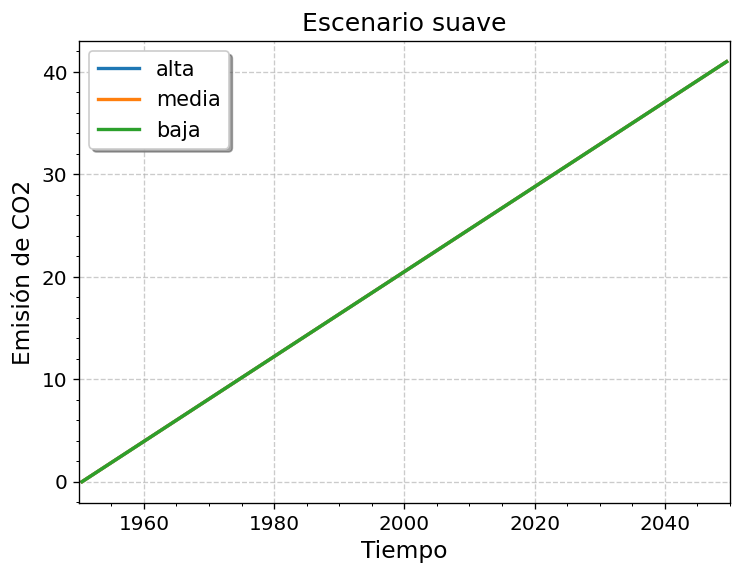

In [43]:
plt.figure(figsize=(7,5),dpi=120)
plt.plot(f.timepoints, f.emissions.loc[dict(specie='CO2',scenario='suave')], label=f.configs,linewidth=2)
lineplot_setup(1950,2050,'Tiempo','Emisión de CO2',legend=True,title='Escenario suave')

Lo que sí podemos comparar son las emisiones de ambos escenarios para una misma configuración. Por ejemplo:

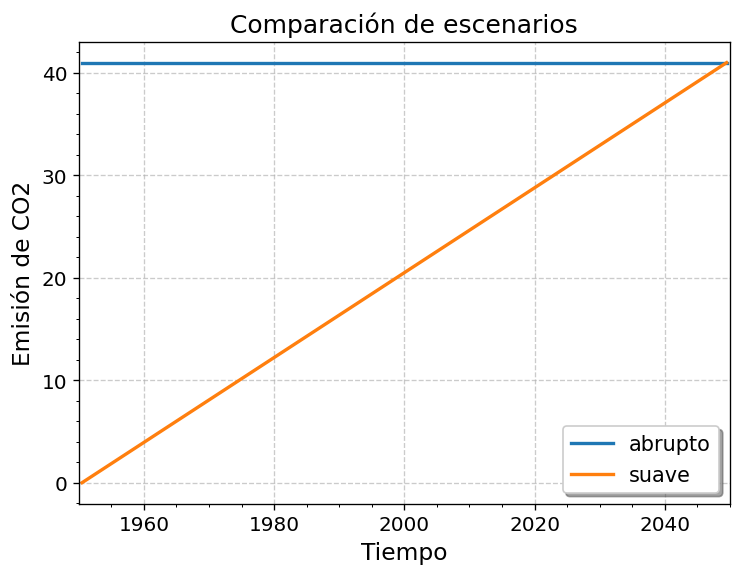

In [44]:
plt.figure(figsize=(7,5),dpi=120)
plt.plot(f.timepoints, f.emissions.loc[dict(specie='CO2',config='alta')], label=f.scenarios,linewidth=2)
lineplot_setup(1950,2050,'Tiempo','Emisión de CO2',legend=True,title='Comparación de escenarios')

---
<a name='ej-1'></a>
### **<font color="DodgerBlue">Ejercicio 1 - Emisiones en FaIR </font>**

<font color="DarkBlue"> 1. Seleccione las emisiones de metano que hemos especificado hasta ahora y muestre su serie de tiempo, para los dos escenarios, así como hicimos para el CO2. 
    
 <font color="DarkBlue"> 2. Compare, para el escenario suave, las emisiones de CO2, las de metano y las de tipo AFOLU en una sola gráfica. 

    
---

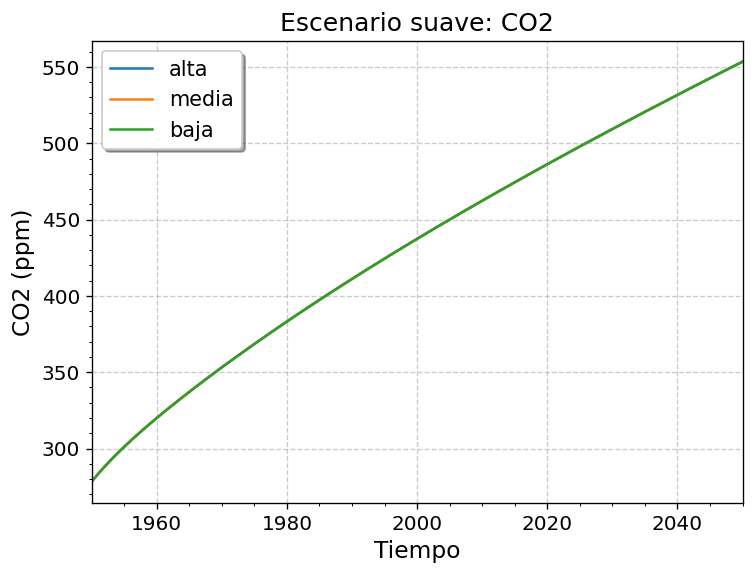

In [34]:
# Vamos ahora a analizar las concentraciones y el forzamiento, o sea por que obtuvimos estos resultados
plt.figure(figsize=(7,5),dpi=120)
plt.plot(f.timebounds, f.concentration.loc[dict(scenario='abrupto', specie='CO2')], label=f.configs)
lineplot_setup(1950,2050,'Tiempo','CO2 (ppm)',legend=True,title='Escenario suave: CO2')

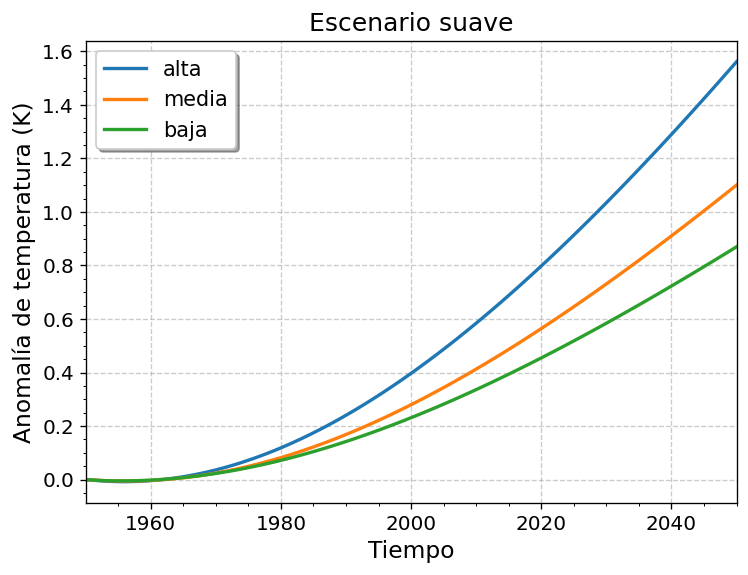

In [35]:
plt.figure(figsize=(7,5),dpi=120)
plt.plot(f.timebounds, f.temperature.loc[dict(scenario='suave', layer=0)], label=f.configs,linewidth=2)
lineplot_setup(1950,2050,'Tiempo','Anomalía de temperatura (K)',legend=True,title='Escenario suave')

Podemos repetirlo ahora para el otro escenario. 

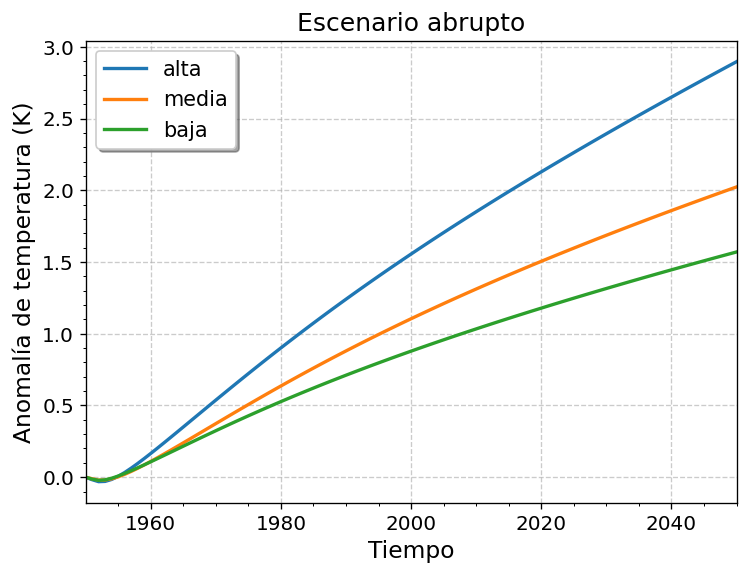

In [36]:
# Ahora para el caso abrupto
plt.figure(figsize=(7,5),dpi=120)
plt.plot(f.timebounds, f.temperature.loc[dict(scenario='abrupto', layer=0)], label=f.configs,linewidth=2)
lineplot_setup(1950,2050,'Tiempo','Anomalía de temperatura (K)',legend=True,title='Escenario abrupto')

De esta manera, podemos evaluar un poco más sobre los arreglos que está usando FaIR y que se están rellenando durante la simulación.  
Por ejemplo el arreglo de concentración `f.concentration`. Este arreglo se encuentra vacío hasta el punto en que se ejecuta el comando para correr el modelo ¿por qué?

Podemos también graficar el objeto de concentración del mismo modo que hicimos para los escenarios, siguiendo la siguiente sintaxis:

`f.concentration.loc[dict()]`

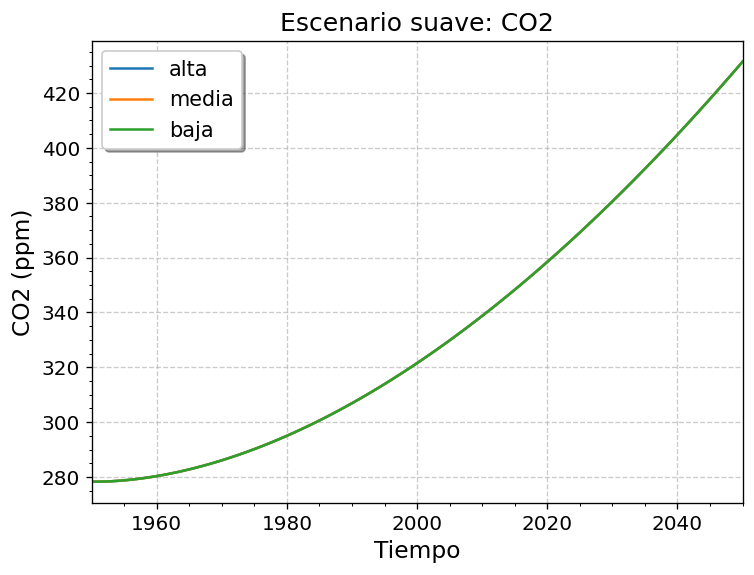

In [37]:
# Vamos ahora a analizar las concentraciones y el forzamiento, o sea por que obtuvimos estos resultados
plt.figure(figsize=(7,5),dpi=120)
plt.plot(f.timebounds, f.concentration.loc[dict(scenario='suave', specie='CO2')], label=f.configs)
lineplot_setup(1950,2050,'Tiempo','CO2 (ppm)',legend=True,title='Escenario suave: CO2')


Todas las líneas se ven iguales porque las concentraciones son las mismas para el mismo escenario, pero las temperaturas son diferentes. ¿Por qué?


<div class="alert alert-block alert-info">
<b>Nota:</b> 
Esto es debido a que la concentraciones están determinadas por el escenario pero la temperatura por la configuración.
</div>
 
Si queremos comparar las concentraciones de los dos escenarios para una misma configuración de sensibilidad, podemos hacer lo siguiente:

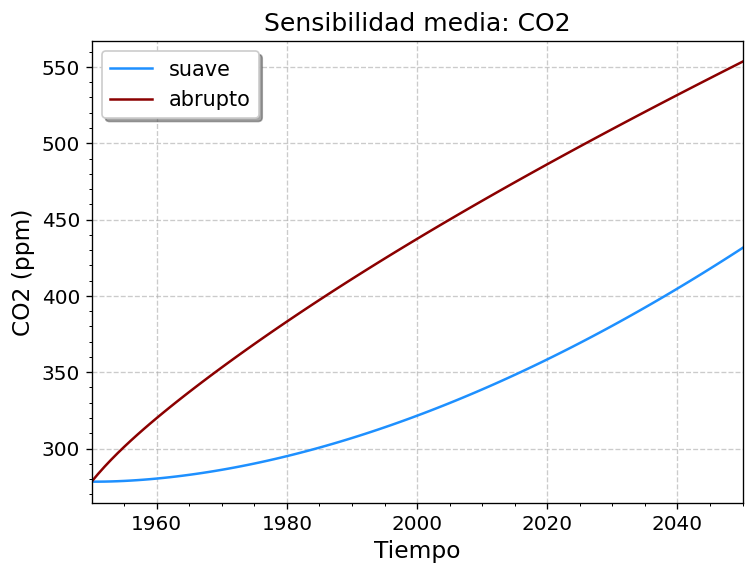

In [38]:
# Comparando escenarios, ya no sensibilidades
colors={'suave':'dodgerblue','abrupto':'darkred'}
plt.figure(figsize=(7,5),dpi=120)
for scenario in ['suave','abrupto']:
    plt.plot(f.timebounds,f.concentration.loc[dict(config='baja',specie='CO2',scenario=scenario)],label=scenario,c=colors[scenario])
lineplot_setup(1950,2050,'Tiempo','CO2 (ppm)',legend=True,title='Sensibilidad media: CO2')

Además de concentraciones, emisiones y temperatura, podemos graficar muchas más cosas, como el forzamiento por una especie en particular o el forzamiento total. 

Lista de cosas que podemos graficar.

1. Temperatura (resultado principal del modelo)
2. Emisiones (delimitadas por el usuario a manera de escenario)
3. Concentración (calculada por el modelo para cada paso de tiempo)
4. Forzamiento (total o individual por forzante).
5. Desbalance energético en el tope de la atmósfera.

Veamos por ejemplo para los aerosoles en el caso abrupto. 

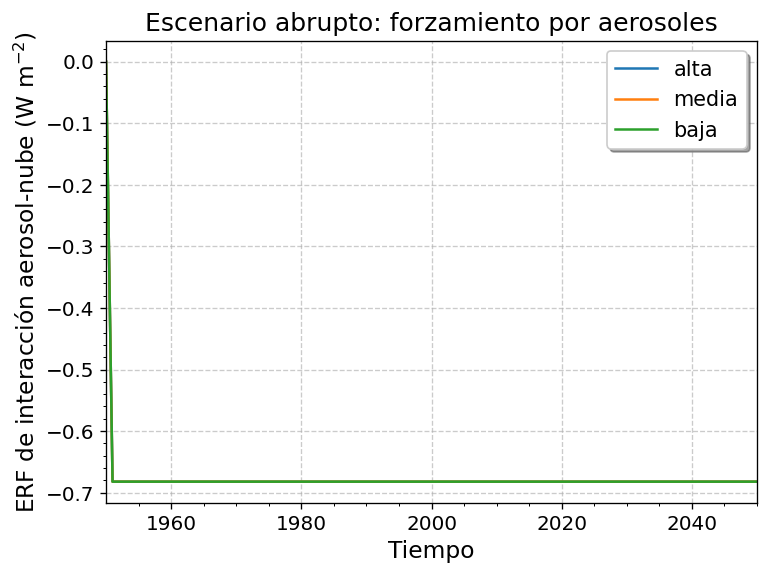

In [39]:
plt.figure(figsize=(7,5),dpi=120)
plt.plot(f.timebounds, f.forcing.loc[dict(scenario='abrupto', specie='ERFaci')], label=f.configs)
lineplot_setup(1950,2050,'Tiempo','ERF de interacción aerosol-nube (W m$^{-2}$)',legend=True,title='Escenario abrupto: forzamiento por aerosoles')


En el caso abrupto, inmediatamente, el forzamiento por aerosoles se vuelve negativo. En el escenario suave el cambio en el forzamiento es paulatino, porque lo definimos como tal. 

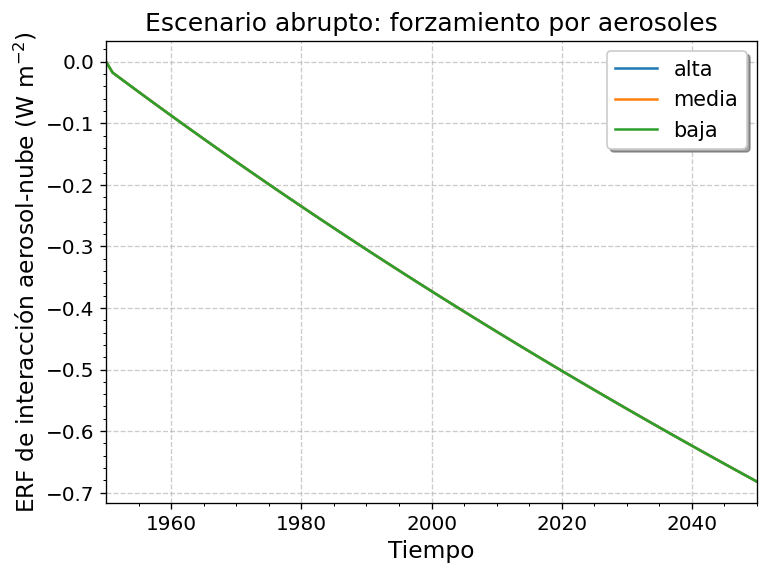

In [40]:
plt.figure(figsize=(7,5),dpi=120)
plt.plot(f.timebounds, f.forcing.loc[dict(scenario='suave', specie='ERFaci')], label=f.configs)
lineplot_setup(1950,2050,'Tiempo','ERF de interacción aerosol-nube (W m$^{-2}$)',legend=True,title='Escenario abrupto: forzamiento por aerosoles')


El forzamiento total existe en la variable `forcing_sum`. Y de nuevo, podemos graficarla de la siguiente manera:

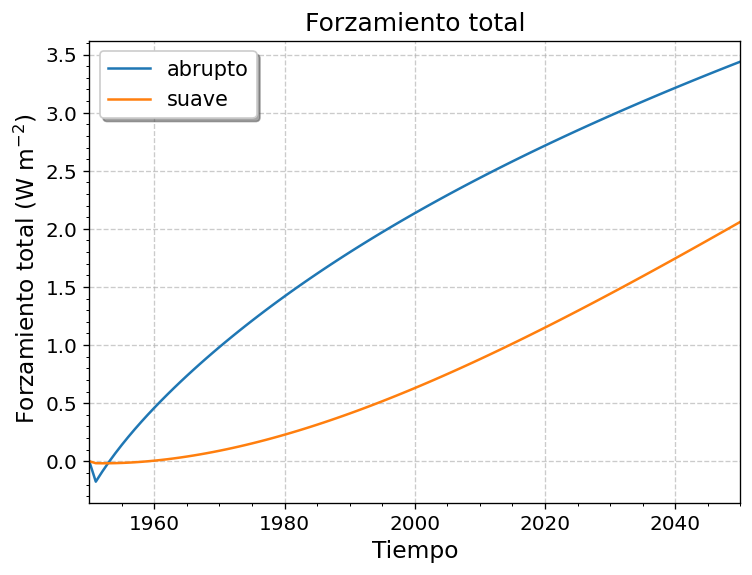

In [41]:
plt.figure(figsize=(7,5),dpi=120)
plt.plot(f.timebounds, f.forcing_sum.loc[dict(config='alta')], label=f.scenarios)
lineplot_setup(1950,2050,'Tiempo',' Forzamiento total (W m$^{-2}$)',legend=True,title='Forzamiento total')


In [42]:
# Si queremos exactamente que mas podemos graficar, modificar o imprimir
vars(f)

{'_ghg_method': 'meinshausen2020',
 '_ch4_method': 'leach2021',
 'gasboxes': range(0, 4),
 'layers': range(0, 3),
 'iirf_max': 100,
 'br_cl_ods_potential': 45,
 '_n_gasboxes': 4,
 '_n_layers': 3,
 'temperature_prescribed': False,
 'timebounds': array([1950., 1951., 1952., 1953., 1954., 1955., 1956., 1957., 1958.,
        1959., 1960., 1961., 1962., 1963., 1964., 1965., 1966., 1967.,
        1968., 1969., 1970., 1971., 1972., 1973., 1974., 1975., 1976.,
        1977., 1978., 1979., 1980., 1981., 1982., 1983., 1984., 1985.,
        1986., 1987., 1988., 1989., 1990., 1991., 1992., 1993., 1994.,
        1995., 1996., 1997., 1998., 1999., 2000., 2001., 2002., 2003.,
        2004., 2005., 2006., 2007., 2008., 2009., 2010., 2011., 2012.,
        2013., 2014., 2015., 2016., 2017., 2018., 2019., 2020., 2021.,
        2022., 2023., 2024., 2025., 2026., 2027., 2028., 2029., 2030.,
        2031., 2032., 2033., 2034., 2035., 2036., 2037., 2038., 2039.,
        2040., 2041., 2042., 2043., 2044., 204

---
<a name='ej-1'></a>
### **<font color="DodgerBlue">Ejercicio 2 - FaIR versión artesanal </font>**

<font color="DarkBlue"> 1. Haga una simulación que sea exactamente igual a la del escenario abrupto, configuración alta que vimos en clase pero modificando:
    
 <font color="DarkBlue"> a) Las emisiones de CO$_2$, tanto AFOLU como por combustibles fósiles, no aumentan abruptamente sino paulatinamente llegando a valores máximos de 5 y 50, respectivamente.

 <font color="DarkBlue"> b) Disminuya la capacidad calorífica del océano en cada capa por un 10% de su valor original. 
    
<font color="DarkBlue"> 2. Grafique sus resultados para la temperatura superficial y compárela con sus resultados originales. 
    
<font color="DarkBlue"> 3. Grafique, además, los resultados para el balance, o desbalance radiativo en el tope de la atmósfera (TOA, top of atmosphere).  
    
<font color="DarkBlue"> 4. Explique sus resultados, si es que puede. Si no puede, escriba ''no puedo pero le debo un chocorrol al profe si me apunta en el pizarrón que ya terminé''. 
    
---